## Imports

In [1]:
import matplotlib
import sys
import numpy as np
sys.path.append("../lib")
import em1d as zpic
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (12, 8)


## Electron Plasma Waves

In [2]:
v_the = 0.03
electrons = zpic.Species( "electrons", -1.0, ppc = 64, uth=[v_the,v_the,v_the])
sim = zpic.Simulation( nx = 500, box = 50.0, dt = 0.0999/2, species = electrons )

In [14]:
electrons.particles.shape

(32000,)

In [3]:
niter = 2000

Ex_t = np.zeros((niter,sim.nx))
Ez_t = np.zeros((niter,sim.nx))
Ey_t = np.zeros((niter,sim.nx))
tmax = niter * sim.dt

print(f"Running simulation up to t = {tmax:g} ...")
while sim.t <= tmax:
    print(f'n = {sim.n}, t = {sim.t:.2f}', end = '\r')
    Ex_t[sim.n,:] = sim.emf.Ex
    Ez_t[sim.n,:] = sim.emf.Ez
    Ey_t[sim.n,:] = sim.emf.Ey
    sim.iter()

print("\nDone.")

Running simulation up to t = 99.9 ...
n = 1999, t = 99.85
Done.


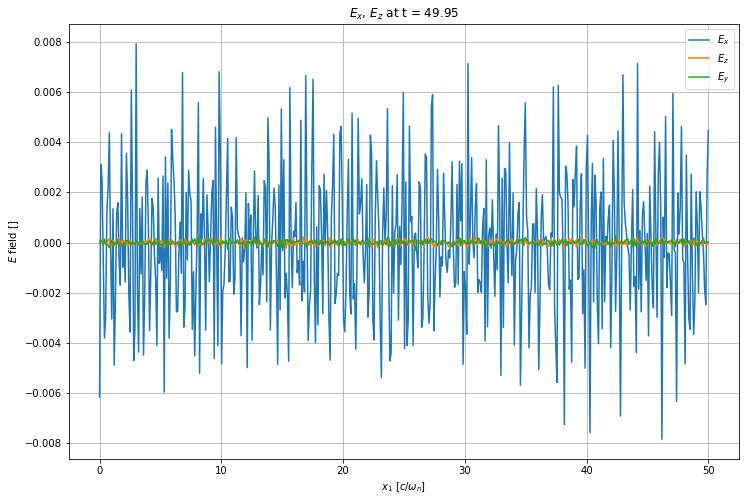

In [6]:
iter = sim.n//2
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ex_t[iter,:], label = "$E_x$")
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ez_t[iter,:], label = "$E_z$")
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ey_t[iter,:], label = "$E_y$")
plt.grid(True)

plt.xlabel("$x_1$ [$c/\omega_n$]")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ at t = {(iter * sim.dt):g}")
plt.legend()
plt.show()

In [7]:
t = np.arange(0, niter * sim.dt, sim.dt)
t.shape

(2000,)

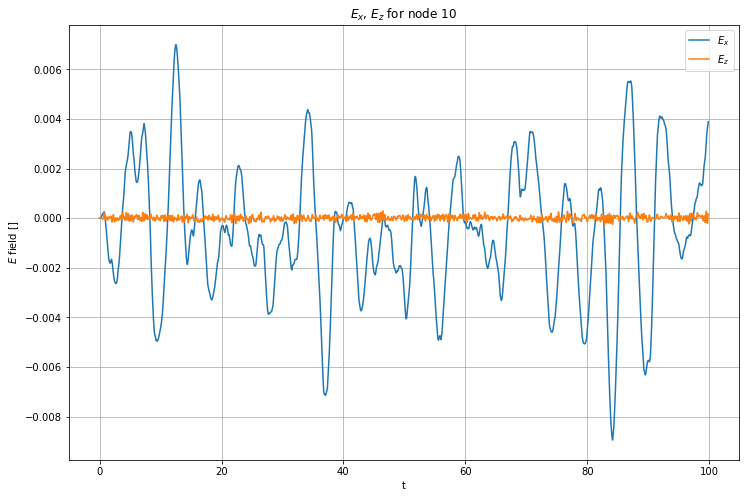

In [8]:
node = 10
Ex_node = Ex_t[:,node]
Ez_node = Ez_t[:,node]
plt.plot(t,Ex_node, label = "$E_x$")
plt.plot(t,Ez_node, label = "$E_z$")
plt.grid(True)

plt.xlabel("t")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node}")
plt.legend()
plt.show()

In [9]:
Ez_node_fft = np.abs(np.fft.fft(Ez_node))
Ex_node_fft = np.abs(np.fft.fft(Ex_node))

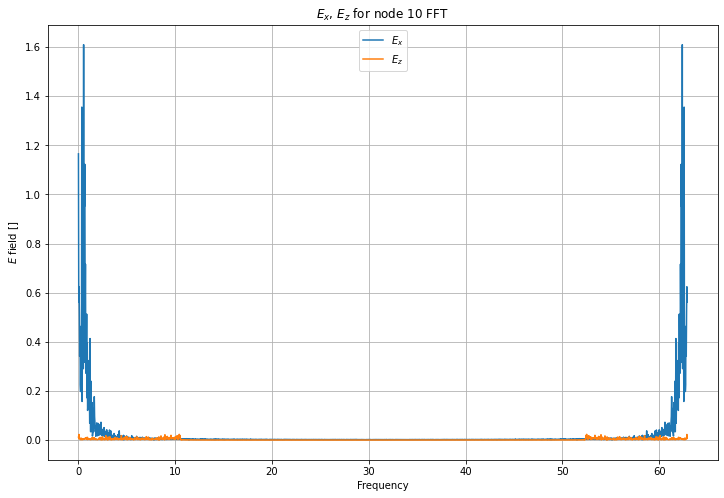

In [10]:
omega_max = np.pi / sim.dt
omega = np.linspace(0, omega_max, num = niter)
plt.plot(omega,Ex_node_fft, label = "$E_x$")
plt.plot(omega,Ez_node_fft, label = "$E_z$")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node} FFT")
plt.legend()
plt.show()

In [28]:
Ez_node_fft = np.fft.fftshift(Ez_node_fft)
Ex_node_fft = np.fft.fftshift(Ex_node_fft)

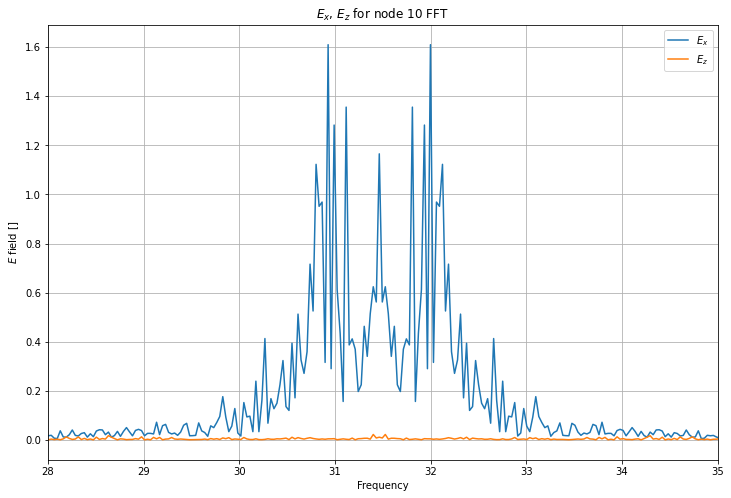

In [31]:
omega_max = np.pi / sim.dt
omega = np.linspace(0, omega_max, num = niter)
plt.plot(omega,Ex_node_fft, label = "$E_x$")
plt.plot(omega,Ez_node_fft, label = "$E_z$")
plt.grid(True)
plt.xlim(28, 35)
plt.xlabel("Frequency")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node} FFT")
plt.legend()
plt.show()

In [39]:
def fields_at_node(node):
    Ex_node = Ex_t[:,node]
    Ez_node = Ez_t[:,node]
    Ez_node_fft = np.abs(np.fft.fft(Ez_node))
    Ex_node_fft = np.abs(np.fft.fft(Ex_node))
    Ez_node_fft = np.fft.fftshift(Ez_node_fft)
    Ex_node_fft = np.fft.fftshift(Ex_node_fft)
    omega_max = np.pi / sim.dt
    omega = np.linspace(0, omega_max, num = niter)
    plt.plot(omega,Ex_node_fft, label = "$E_x$")
    plt.plot(omega,Ez_node_fft, label = "$E_z$")
    plt.grid(True)
    plt.xlim(28, 35)
    plt.xlabel("Frequency")
    plt.ylabel("$E$ field []")
    plt.title(f"$E_x$, $E_z$ for node {node} FFT Shifted")
    plt.legend()
    plt.show()

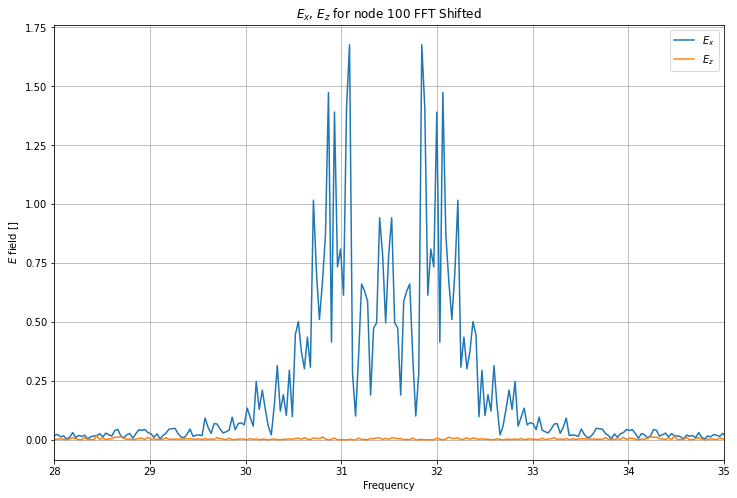

In [40]:
fields_at_node(100)

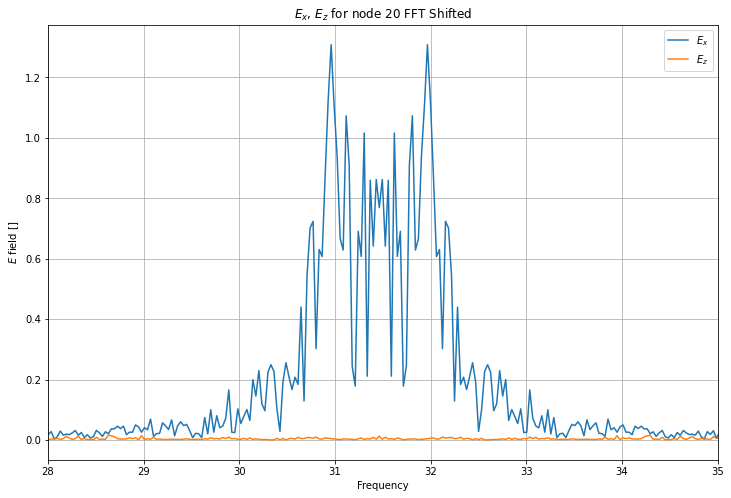

In [41]:
fields_at_node(20)

In [11]:
z_field = np.abs(np.fft.fft2(Ez_t[:,:]))
z_field = np.fft.fftshift(z_field)

x_field = np.abs(np.fft.fft2(Ex_t[:,:]))
x_field = np.fft.fftshift(x_field)

y_field = np.abs(np.fft.fft2(Ey_t[:,:]))
y_field = np.fft.fftshift(y_field)

31.415926067764154
62.894747947202916


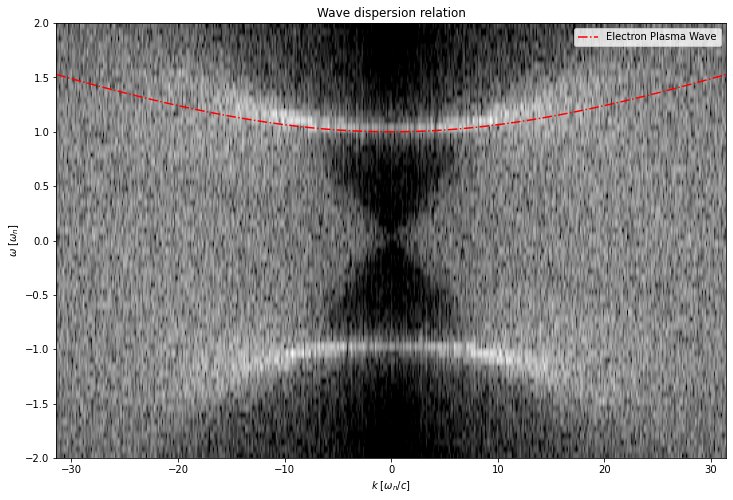

In [59]:
import matplotlib.colors as colors
k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt
print(k_max)
print(omega_max)
plt.imshow( x_field, origin = 'lower',  norm=colors.LogNorm(vmin = 1.0),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto', cmap = 'gray')
k = np.linspace(-k_max, k_max, num = 512)
w=np.sqrt(1 + 1.5 * v_the**2 * k**2)
plt.plot( k, w, label = "Electron Plasma Wave", color = 'r',ls = '-.' )
plt.ylim(-2,2)
plt.xlim(-k_max,k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("Wave dispersion relation")

plt.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


31.415926067764154
62.894747947202916


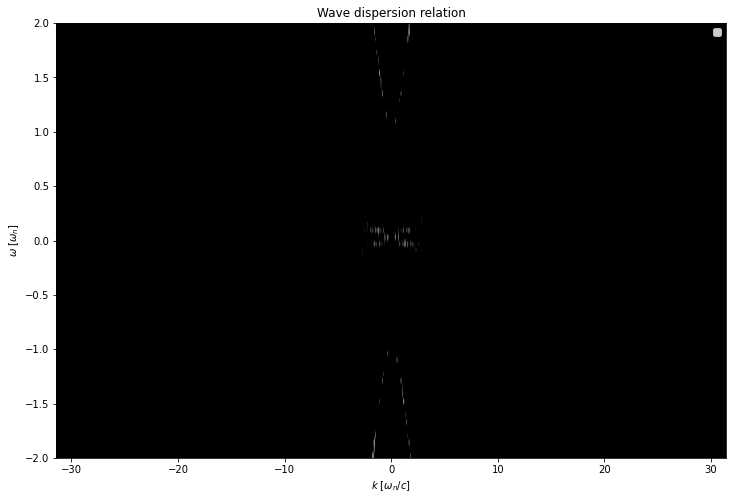

In [13]:
import matplotlib.colors as colors
k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt
print(k_max)
print(omega_max)
plt.imshow( y_field, origin = 'lower',  norm=colors.LogNorm(vmin = 1.0),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto', cmap = 'gray')
k = np.linspace(-k_max, k_max, num = 512)
w=np.sqrt(1 + 1.5 * v_the**2 * k**2)
# plt.plot( k, w, label = "Electron Plasma Wave", color = 'r',ls = '-.' )
plt.ylim(-2,2)
plt.xlim(-k_max,k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("Wave dispersion relation")

plt.legend()

plt.show()


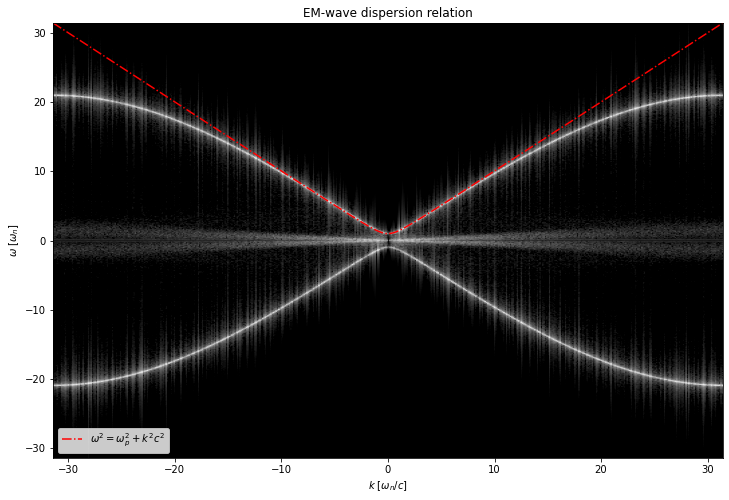

In [58]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# (omega,k) power spectrum

win = np.hanning(niter)
for i in range(sim.nx):
    Ez_t[:, i] *= win

sp = np.abs(np.fft.fft2(Ez_t)) ** 2
sp = np.fft.fftshift(sp)

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt

plt.imshow(
    z_field,
    origin="lower",
    norm=colors.LogNorm(vmin=1e-2, vmax=5),
    extent=(-k_max, k_max, -omega_max, omega_max),
    aspect="auto",
    cmap="gray",
)

k = np.linspace(-k_max, k_max, num=512)
w = np.sqrt(1 + k ** 2)
plt.plot(k, w, label="$\omega^2 = \omega_p^2 + k^2 c^2$", color="r", ls="-.")


plt.ylim(-k_max, k_max)
plt.xlim(-k_max, k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("EM-wave dispersion relation")

plt.legend()

plt.show()


## Cold Plasma

In [107]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12, 8)

# Add zpic library to path
import sys
sys.path.append("../../lib")

import em1d as zpic

#v_the = 0.001
v_the = 0.0
#v_the = 0.20

electrons = zpic.Species( "electrons", -1.0, ppc = 64, uth=[v_the,v_the,v_the])
sim = zpic.Simulation( nx = 500, box = 50.0, dt = 0.0999/2, species = electrons )
ext = zpic.ExternalField(E_type = 'uniform', E_0 = [0.01,0.0,0.0])
sim.emf.set_ext_fld( ext)

In [91]:
import numpy as np

niter = 4000

Ex_t = np.zeros((niter,sim.nx))
Ez_t = np.zeros((niter,sim.nx))

tmax = niter * sim.dt

print("\nRunning simulation up to t = {:g} ...".format(tmax))
while sim.t <= tmax:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    Ex_t[sim.n,:] = sim.emf.Ex_part
    Ez_t[sim.n,:] = sim.emf.Ez_part
    sim.iter()

print("\nDone.")


Running simulation up to t = 199.8 ...
n = 3999, t = 199.751
Done.


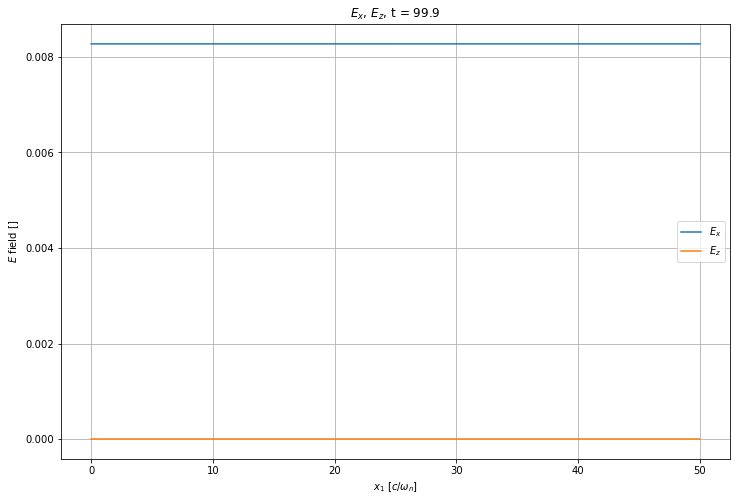

In [92]:
import matplotlib.pyplot as plt

iter = sim.n//2
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ex_t[iter,:], label = "$E_x$")
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ez_t[iter,:], label = "$E_z$")
plt.grid(True)

plt.xlabel("$x_1$ [$c/\omega_n$]")
plt.ylabel("$E$ field []")
plt.title("$E_x$, $E_z$, t = {:g}".format( iter * sim.dt))
plt.legend()
plt.show()

In [100]:
sp = np.abs(np.fft.fft2(Ex_t))**2
sp = np.fft.fftshift( sp )

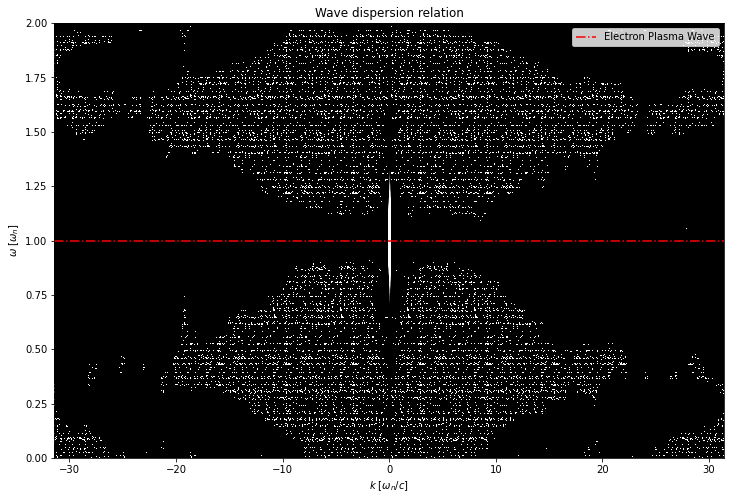

In [101]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt

plt.imshow( sp, origin = 'lower', norm=colors.LogNorm(vmin = 1.0, vmax=10),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto', cmap = 'gray')

k = np.linspace(-k_max, k_max, num = 512)
w=np.ones(k.shape)
plt.plot( k, w, label = "Electron Plasma Wave", color = 'r',ls = '-.' )


plt.ylim(0,2)
# plt.xlim(0,k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("Wave dispersion relation")

plt.legend()

plt.show()


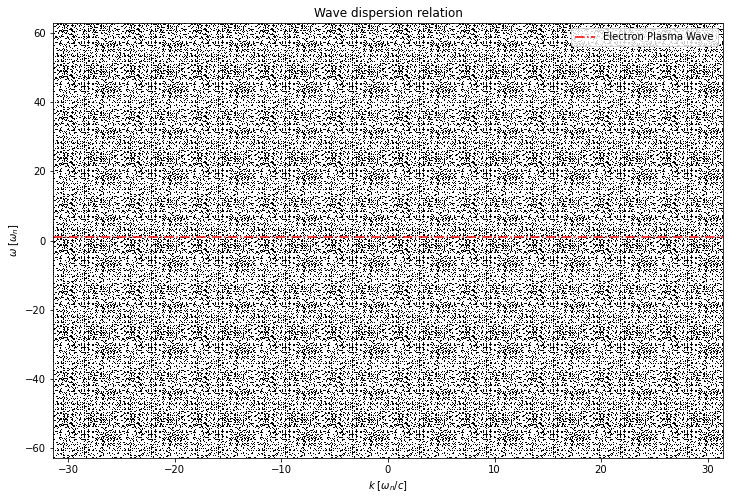

In [106]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

sp = np.abs(np.fft.fft2(Ez_t))**2
sp = np.fft.fftshift( sp )

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt

plt.imshow( sp, origin = 'lower', norm=colors.LogNorm(vmin = 0, vmax=10),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto', cmap = 'gray')

k = np.linspace(-k_max, k_max, num = 512)
w=np.ones(k.shape)
plt.plot( k, w, label = "Electron Plasma Wave", color = 'r',ls = '-.' )


# plt.ylim(0,2)
# plt.xlim(0,k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("Wave dispersion relation")

plt.legend()

plt.show()


## With Magnetic Field

In [80]:
v_the = 0.03
electrons = zpic.Species( "electrons", -1.0, ppc = 64, uth=[v_the,v_the,v_the])
sim = zpic.Simulation( nx = 500, box = 50.0, dt = 0.0999/2, species = electrons )

In [81]:
ext = zpic.ExternalField(B_type = 'uniform', B_0 = [0.0,0.0,1.0])
sim.emf.set_ext_fld( ext )

In [82]:
niter = 2000

Ex_t = np.zeros((niter,sim.nx))
Ez_t = np.zeros((niter,sim.nx))
Bz_t = np.zeros((niter,sim.nx))
tmax = niter * sim.dt

print(f"Running simulation up to t = {tmax:g} ...")
while sim.t <= tmax:
    print(f'n = {sim.n}, t = {sim.t:.2f}', end = '\r')
    Ex_t[sim.n,:] = sim.emf.Ex_part
    Ez_t[sim.n,:] = sim.emf.Ez_part
    Bz_t[sim.n,:] = sim.emf.Bz_part
    sim.iter()

print("\nDone.")

Running simulation up to t = 99.9 ...
n = 1999, t = 99.85
Done.


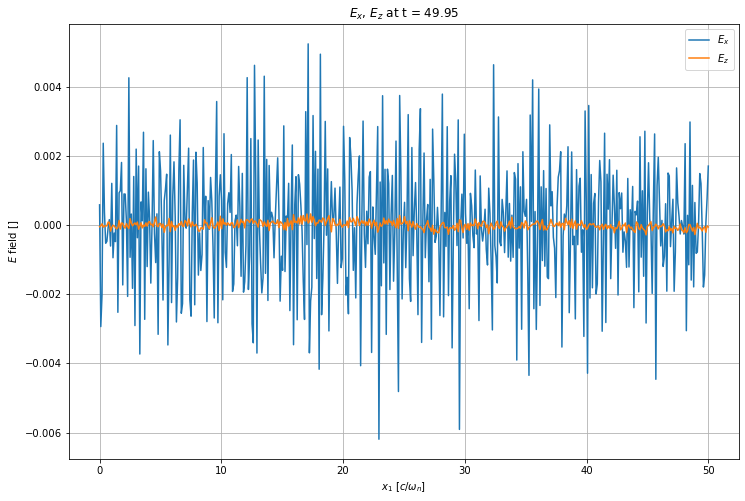

In [83]:
iter = sim.n//2
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ex_t[iter,:], label = "$E_x$")
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ez_t[iter,:], label = "$E_z$")
# plt.plot(np.linspace(0, sim.box, num = sim.nx),Bz_t[iter,:], label = "$B_z$")
plt.grid(True)

plt.xlabel("$x_1$ [$c/\omega_n$]")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ at t = {(iter * sim.dt):g}")
plt.legend()
plt.show()

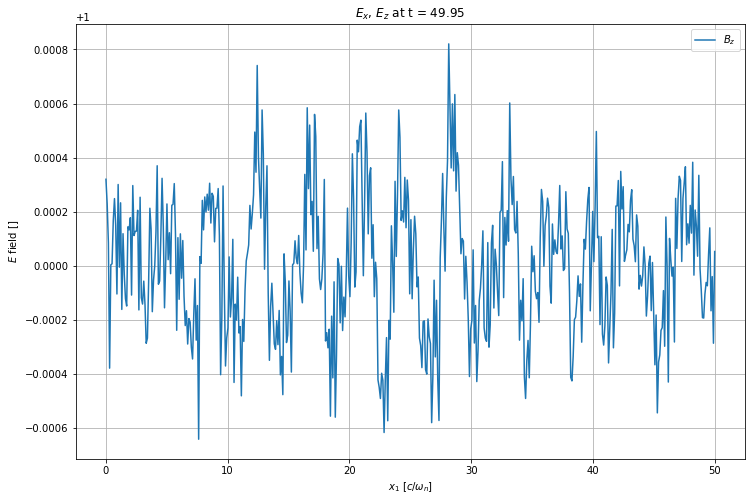

In [84]:
iter = sim.n//2
# plt.plot(np.linspace(0, sim.box, num = sim.nx),Ex_t[iter,:], label = "$E_x$")
# plt.plot(np.linspace(0, sim.box, num = sim.nx),Ez_t[iter,:], label = "$E_z$")
plt.plot(np.linspace(0, sim.box, num = sim.nx),Bz_t[iter,:], label = "$B_z$")
plt.grid(True)

plt.xlabel("$x_1$ [$c/\omega_n$]")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ at t = {(iter * sim.dt):g}")
plt.legend()
plt.show()

In [85]:
t = np.arange(0, niter * sim.dt, sim.dt)
t.shape

(2000,)

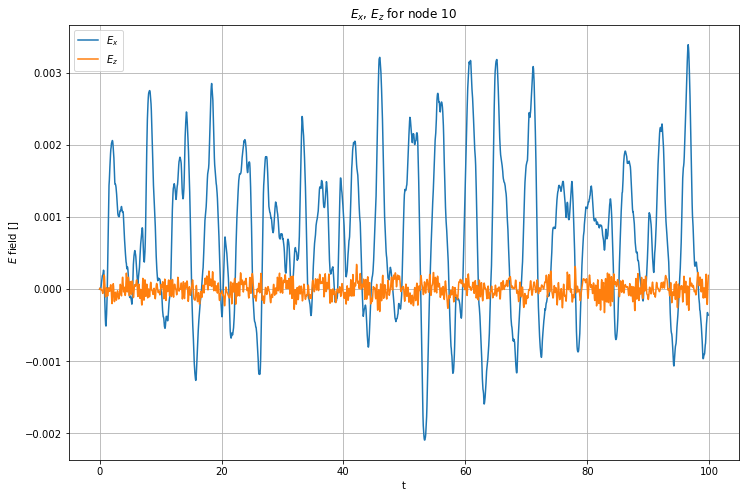

In [86]:
node = 10
Ex_node = Ex_t[:,node]
Ez_node = Ez_t[:,node]
plt.plot(t,Ex_node, label = "$E_x$")
plt.plot(t,Ez_node, label = "$E_z$")
plt.grid(True)

plt.xlabel("t")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node}")
plt.legend()
plt.show()

In [87]:
Ez_node_fft = np.abs(np.fft.fft(Ez_node))
Ex_node_fft = np.abs(np.fft.fft(Ex_node))

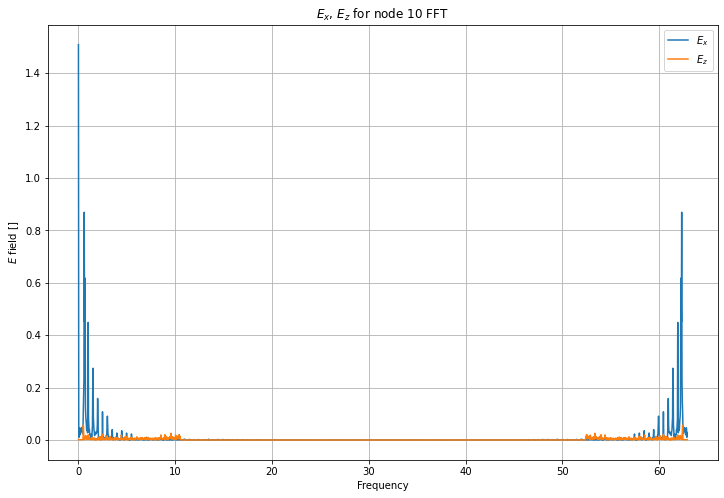

In [88]:
omega_max = np.pi / sim.dt
omega = np.linspace(0, omega_max, num = niter)
plt.plot(omega,Ex_node_fft, label = "$E_x$")
plt.plot(omega,Ez_node_fft, label = "$E_z$")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node} FFT")
plt.legend()
plt.show()

In [89]:
Ez_node_fft = np.fft.fftshift(Ez_node_fft)
Ex_node_fft = np.fft.fftshift(Ex_node_fft)

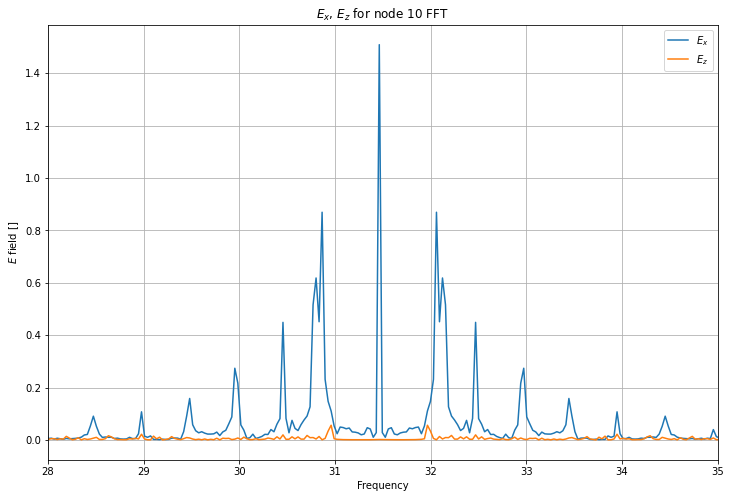

In [90]:
omega_max = np.pi / sim.dt
omega = np.linspace(0, omega_max, num = niter)
plt.plot(omega,Ex_node_fft, label = "$E_x$")
plt.plot(omega,Ez_node_fft, label = "$E_z$")
plt.grid(True)
plt.xlim(28, 35)
plt.xlabel("Frequency")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node} FFT")
plt.legend()
plt.show()

In [91]:
def fields_at_node(node):
    Ex_node = Ex_t[:,node]
    Ez_node = Ez_t[:,node]
    Ez_node_fft = np.abs(np.fft.fft(Ez_node))
    Ex_node_fft = np.abs(np.fft.fft(Ex_node))
    Ez_node_fft = np.fft.fftshift(Ez_node_fft)
    Ex_node_fft = np.fft.fftshift(Ex_node_fft)
    omega_max = np.pi / sim.dt
    omega = np.linspace(0, omega_max, num = niter)
    plt.plot(omega,Ex_node_fft, label = "$E_x$")
    plt.plot(omega,Ez_node_fft, label = "$E_z$")
    plt.grid(True)
    plt.xlim(28, 35)
    plt.xlabel("Frequency")
    plt.ylabel("$E$ field []")
    plt.title(f"$E_x$, $E_z$ for node {node} FFT Shifted")
    plt.legend()
    plt.show()

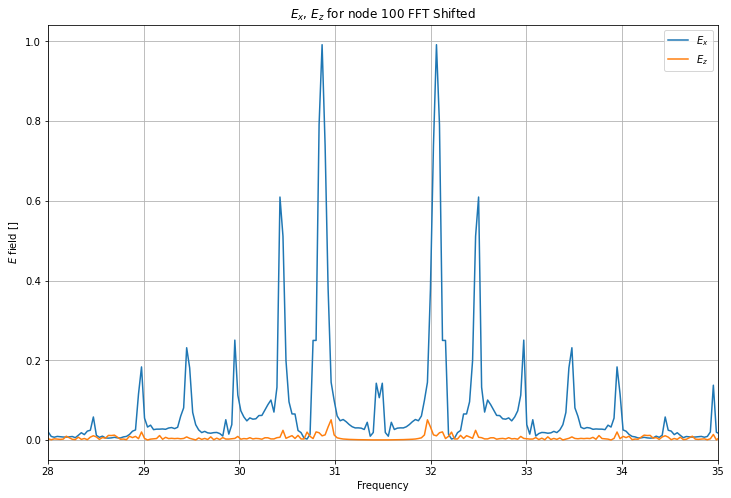

In [92]:
fields_at_node(100)

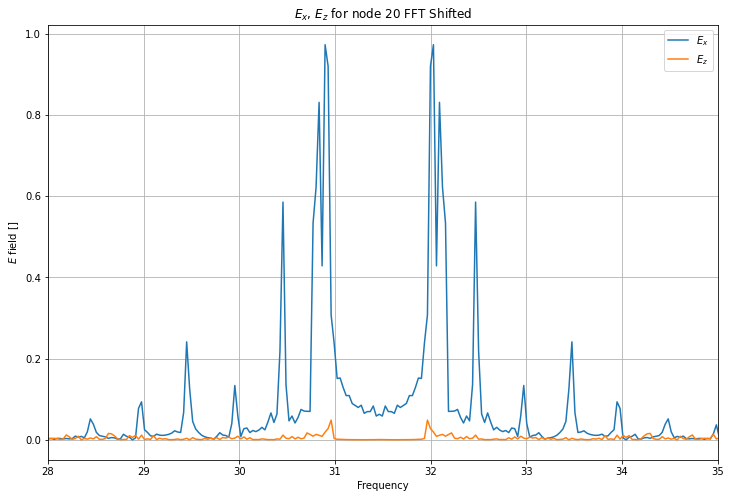

In [93]:
fields_at_node(20)

In [94]:
z_field = np.abs(np.fft.fft2(Ez_t[:,:]))
z_field = np.fft.fftshift(z_field)

x_field = np.abs(np.fft.fft2(Ex_t[:,:]))
x_field = np.fft.fftshift(x_field)

bz_field = np.abs(np.fft.fft2(Bz_t[:,:]))
bz_field = np.fft.fftshift(bz_field)

31.415926067764154
62.894747947202916


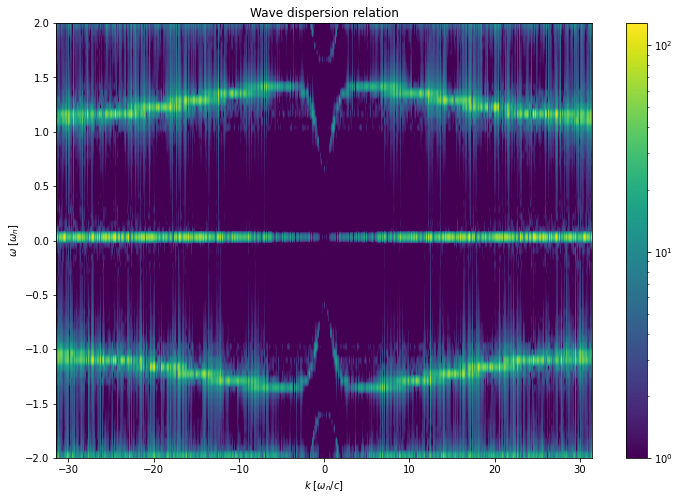

In [95]:
import matplotlib.colors as colors
win = np.hanning(niter)
for i in range(sim.nx):
    Ez_t[:, i] *= win

sp = np.abs(np.fft.fft2(Ez_t)) ** 2
sp = np.fft.fftshift(sp)

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt
print(k_max)
print(omega_max)
plt.imshow( x_field, origin = 'lower',  norm=colors.LogNorm(vmin = 1.0),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto', cmap = 'viridis')
plt.colorbar()
k = np.linspace(-k_max, k_max, num = 512)
w=np.sqrt(1 + 1.5 * v_the**2 * k**2)
# plt.plot( k, w, label = "Electron Plasma Wave", color = 'r',ls = '-.' )
plt.ylim(-2,2)
plt.xlim(-k_max,k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("Wave dispersion relation")

# plt.legend()

plt.show()


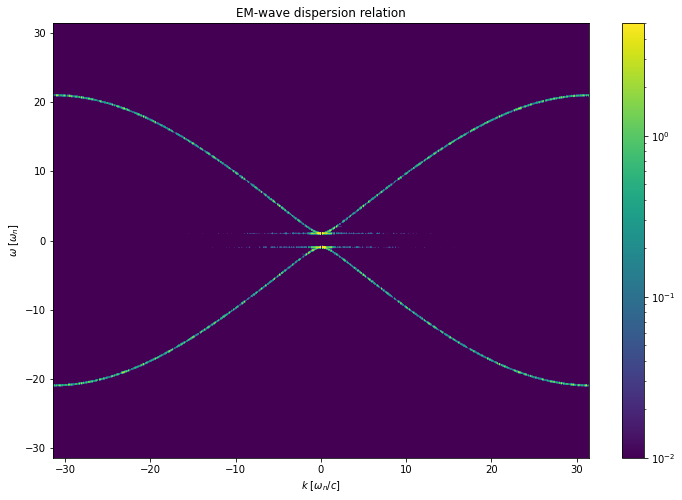

In [96]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# (omega,k) power spectrum

win = np.hanning(niter)
for i in range(sim.nx):
    Ez_t[:, i] *= win

sp = np.abs(np.fft.fft2(Ez_t)) ** 2
sp = np.fft.fftshift(sp)

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt

plt.imshow(
    sp,
    origin="lower",
    norm=colors.LogNorm(vmin=1e-2, vmax=5),
    extent=(-k_max, k_max, -omega_max, omega_max),
    aspect="auto",
    cmap="viridis",
)
plt.colorbar()
k = np.linspace(-k_max, k_max, num=512)
w = np.sqrt(1 + k ** 2)
# plt.plot(k, w, label="$\omega^2 = \omega_p^2 + k^2 c^2$", color="r", ls="-.")


plt.ylim(-k_max, k_max)
plt.xlim(-k_max, k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("EM-wave dispersion relation")

# plt.legend()

plt.show()


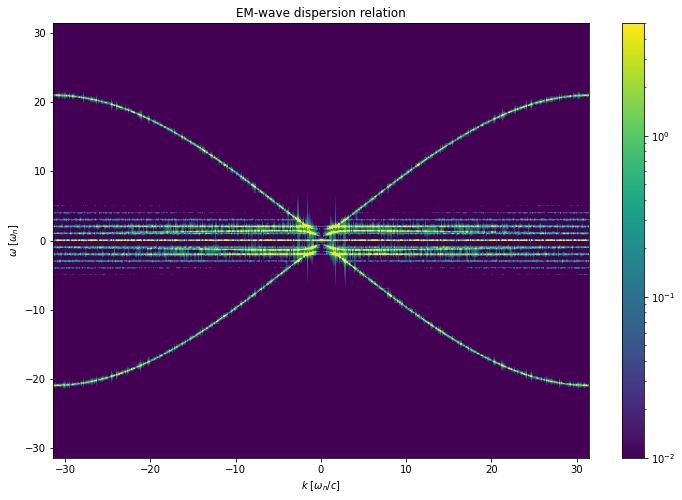

In [97]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# (omega,k) power spectrum

# win = np.hanning(niter)
# for i in range(sim.nx):
#     Bz_t[:, i] *= win

sp = np.abs(np.fft.fft2(Bz_t)) ** 2
sp = np.fft.fftshift(sp)

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt

plt.imshow(
    sp,
    origin="lower",
    norm=colors.LogNorm(vmin=1e-2, vmax=5),
    extent=(-k_max, k_max, -omega_max, omega_max),
    aspect="auto",
    cmap="viridis",
)
plt.colorbar()

k = np.linspace(-k_max, k_max, num=512)
w = np.sqrt(1 + k ** 2)
# plt.plot(k, w, label="$\omega^2 = \omega_p^2 + k^2 c^2$", color="r", ls="-.")


plt.ylim(-k_max, k_max)
plt.xlim(-k_max, k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("EM-wave dispersion relation")

# plt.legend()

plt.show()
